## Import Libraries and load Data

In [1832]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
from matplotlib import pyplot
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns

In [1833]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [1834]:
df.dropna(inplace=True)

In [1835]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,5813800.00%,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,4634400.00%,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,7161300.00%,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,2664600.00%,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,5829300.00%,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,6122300.00%,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,6401400.00%,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,5698100.00%,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,6924500.00%,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [1836]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [1837]:
#drop "ID","Z_CostContact" and "Z_Revenue" column
df = df.drop(columns=["id", "z_costcontact","z_revenue"])

### create new column "age"

In [1838]:
df["age"] = 2014 - df["year_birth"]

In [1839]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [1840]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [1841]:
max(df["age"])

121

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

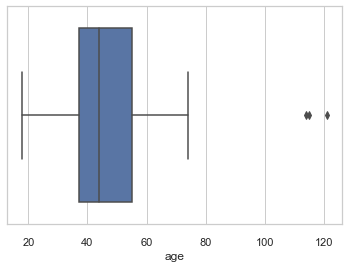

In [1842]:
sns.boxplot(df["age"])

In [1843]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,6018200.00%,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [1844]:
df.drop([239], axis=0, inplace=True)

In [1845]:
max(df["age"])

115

In [1846]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,8353200.00%,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [1847]:
df.drop([339], axis=0, inplace=True)

In [1848]:
max(df["age"])

114

In [1849]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,3664000.00%,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [1850]:
df.drop([192], axis=0, inplace=True)

In [1851]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [1852]:
type(df["dt_customer"][0])

str

def date(datestr="", format="%d-%m-%Y"):
    from datetime import datetime
    if not datestr:
        return datetime.today().date()
    return datetime.strptime(datestr, format).date()

In [1853]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

In [1854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   education            2213 non-null   object        
 1   marital_status       2213 non-null   object        
 2   income               2213 non-null   float64       
 3   kidhome              2213 non-null   int64         
 4   teenhome             2213 non-null   int64         
 5   dt_customer          2213 non-null   datetime64[ns]
 6   recency              2213 non-null   int64         
 7   mntwines             2213 non-null   int64         
 8   mntfruits            2213 non-null   int64         
 9   mntmeatproducts      2213 non-null   int64         
 10  mntfishproducts      2213 non-null   int64         
 11  mntsweetproducts     2213 non-null   int64         
 12  mntgoldprods         2213 non-null   int64         
 13  numdealspurchases    2213 non-nul

In [1855]:
max(df["dt_customer"])

Timestamp('2014-06-29 00:00:00')

### create "cust_since" column + drop "dt_customer"

In [1856]:
#Convert datetime column/series to month
df['cust_since'] = df['dt_customer'].dt.month

In [1857]:
df['cust_since']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: cust_since, Length: 2213, dtype: int64

In [1858]:
df["cust_since"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [1859]:
df["cust_since"] = df["cust_since"].astype("Int64")

In [1860]:
df[["cust_since", "dt_customer"]]

,cust_since,dt_customer
0,21,2012-09-04
1,3,2014-03-08
2,10,2013-08-21
3,4,2014-02-10
4,5,2014-01-19
...,...,...
2235,12,2013-06-13
2236,0,2014-06-10
2237,5,2014-01-25
2238,5,2014-01-24


In [1861]:
#drop "dt_customer"
df.drop(["dt_customer"],axis=1, inplace=True)

### clean education column

In [1862]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [1863]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "0"
    elif x in ['Graduation']:
        return "1"
    elif x in ['Master', 'PhD']:
        return "2"

In [1864]:
df['education'] = list(map(clean_edu, df['education']))

In [1865]:
df['education'] = df['education'].astype(int)

### convert "income" to int

In [1866]:
max(df["income"])

666666.0

In [1867]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2233,1,Together,66666600.00%,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,37,12


In [1868]:
df.drop([2233], axis=0, inplace=True)

In [1869]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [1870]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1871]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2177,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,0,41,20
2202,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,1,41,20


In [1872]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [1873]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [1874]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "0"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "1"

In [1875]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

In [1876]:
df['marital_status'] = df['marital_status'].astype(int)

### new column "children"

In [1877]:
#concat "kidhome" and "teenhome" and create new column "children"
df["children"]= df["kidhome"] + df["teenhome"]

In [1878]:
#drop "kidhome", "teenhome" columns
#df = df.drop(columns=["kidhome","teenhome"])

### concatenate campaigns 

In [1879]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [1880]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [1881]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [1882]:
# column "household_size"
# column "total_amount_spent"

### concatenate columns amounts spent 

In [1883]:
df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

### creating household size column

In [1884]:
df.dtypes

education              int64
marital_status         int64
income                 Int64
kidhome                int64
teenhome               int64
recency                int64
mntwines               int64
mntfruits              int64
mntmeatproducts        int64
mntfishproducts        int64
mntsweetproducts       int64
mntgoldprods           int64
numdealspurchases      int64
numwebpurchases        int64
numcatalogpurchases    int64
numstorepurchases      int64
numwebvisitsmonth      int64
complain               int64
response               int64
age                    int64
cust_since             Int64
children               int64
acc_camp               int64
total_spent            int64
dtype: object

In [1885]:
df["household_size"] = df["marital_status"] + df["children"] + 1

In [1886]:
df.drop(["children"], axis=1, inplace=True)

## plotting

### correlation heatmap

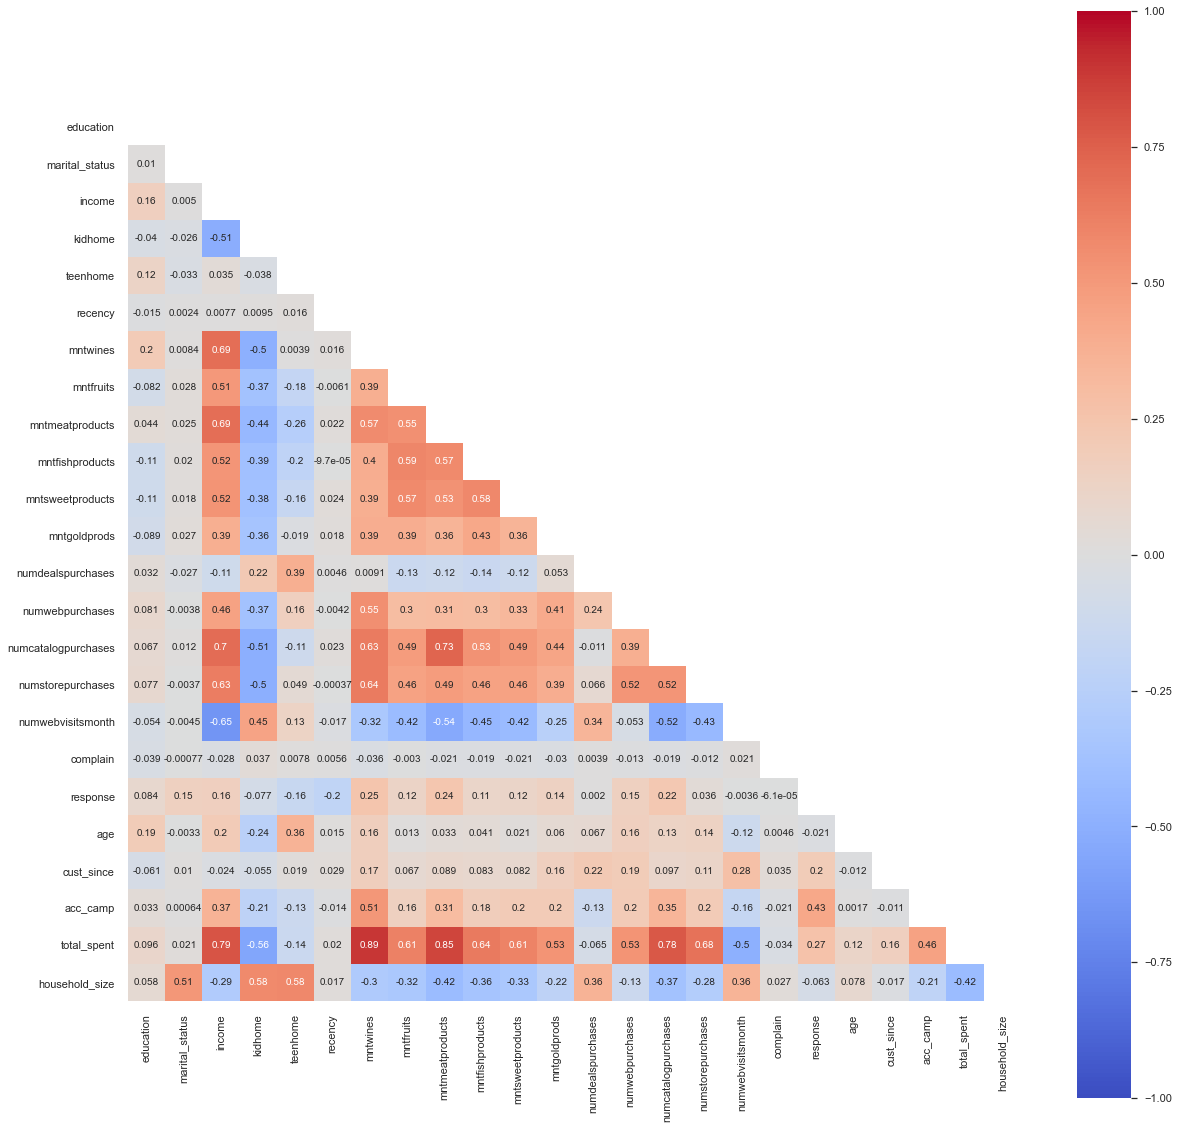

In [1887]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [1888]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['income'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

['total_spent', 'numcatalogpurchases', 'mntmeatproducts', 'mntwines', 'numwebvisitsmonth', 'numstorepurchases', 'mntsweetproducts', 'mntfishproducts', 'kidhome', 'mntfruits', 'numwebpurchases', 'mntgoldprods', 'acc_camp', 'income']


,total_spent,numcatalogpurchases,mntmeatproducts,mntwines,numwebvisitsmonth,numstorepurchases,mntsweetproducts,mntfishproducts,kidhome,mntfruits,numwebpurchases,mntgoldprods,acc_camp,income
0,1617,10,546,635,7,4,88,172,0,88,8,88,0,58138
1,27,1,6,11,5,2,1,2,1,1,1,6,0,46344
2,776,2,127,426,4,10,21,111,0,49,8,42,0,71613
3,53,0,20,11,6,4,3,10,1,4,2,5,0,26646
4,422,3,118,173,5,6,27,46,1,43,5,15,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1341,3,182,709,5,4,118,42,0,43,9,247,0,61223
2236,444,2,30,406,7,5,0,0,2,0,8,8,1,64014
2237,1241,3,217,908,6,13,12,32,0,48,2,24,1,56981
2238,843,5,214,428,3,10,30,80,0,30,6,61,0,69245


In [1889]:
df.describe()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
count,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,...,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%
mean,126.74%,35.38%,5196200.23%,44.21%,50.54%,4906.11%,30527.24%,2635.07%,16713.57%,3767.92%,...,267.38%,580.63%,531.90%,0.90%,15.02%,4509.00%,1111.31%,29.86%,60743.39%,230.14%
std,65.13%,47.83%,2153676.02%,53.70%,54.43%,2892.31%,33747.52%,3975.58%,22432.83%,5478.75%,...,292.84%,325.24%,242.54%,9.47%,35.74%,1170.62%,663.37%,67.98%,60276.08%,87.19%
min,0.00%,0.00%,173000.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,1800.00%,0.00%,0.00%,500.00%,100.00%
25%,100.00%,0.00%,3520850.00%,0.00%,0.00%,2400.00%,2400.00%,200.00%,1600.00%,300.00%,...,0.00%,300.00%,300.00%,0.00%,0.00%,3700.00%,500.00%,0.00%,6900.00%,200.00%
50%,100.00%,0.00%,5138150.00%,0.00%,0.00%,4900.00%,17450.00%,800.00%,6800.00%,1200.00%,...,200.00%,500.00%,600.00%,0.00%,0.00%,4400.00%,1100.00%,0.00%,39650.00%,200.00%
75%,200.00%,100.00%,6848700.00%,100.00%,100.00%,7400.00%,50500.00%,3300.00%,23275.00%,5000.00%,...,400.00%,800.00%,700.00%,0.00%,0.00%,5500.00%,1700.00%,0.00%,104800.00%,300.00%
max,200.00%,100.00%,16239700.00%,200.00%,200.00%,9900.00%,149300.00%,19900.00%,172500.00%,25900.00%,...,2800.00%,1300.00%,2000.00%,100.00%,100.00%,7400.00%,2200.00%,400.00%,252500.00%,500.00%


### histograms

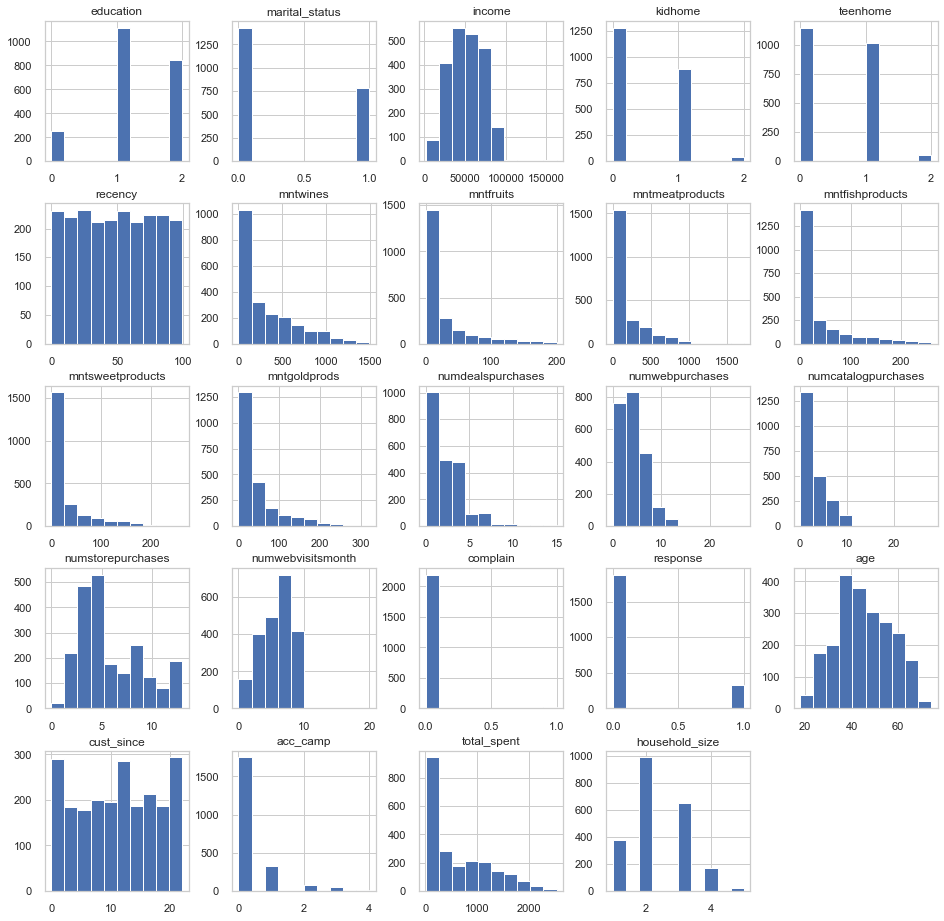

In [1890]:
df.hist(figsize=(16,16))
plt.show()

## preprocessing for modeling

### encode categorical features

In [1891]:
# heatmap to show mean of each feature in the cluster
from sklearn.preprocessing import OneHotEncoder

In [1892]:
df["marital_status"]=pd.get_dummies(df["marital_status"], drop_first=True)

In [1893]:
df["marital_status"]

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: marital_status, Length: 2210, dtype: uint8

### Standard scaler

In [1894]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
0,1,1,58138,0,0,58,635,88,546,172,...,10,4,7,0,1,57,21,0,1617,2
1,1,1,46344,1,1,38,11,1,6,2,...,1,2,5,0,0,60,3,0,27,4
2,1,0,71613,0,0,26,426,49,127,111,...,2,10,4,0,0,49,10,0,776,1
3,1,0,26646,1,0,26,11,4,20,10,...,0,4,6,0,0,30,4,0,53,2
4,2,0,58293,1,0,94,173,43,118,46,...,3,6,5,0,0,33,5,0,422,2


,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
0,-41.07%,135.13%,28.68%,-82.34%,-92.88%,30.91%,97.73%,155.10%,168.93%,245.22%,...,250.23%,-55.55%,69.32%,-9.56%,237.84%,101.76%,149.07%,-43.94%,167.53%,-34.57%
1,-41.07%,135.13%,-26.09%,103.91%,90.88%,-38.25%,-87.22%,-63.78%,-71.85%,-65.14%,...,-57.17%,-117.06%,-13.16%,-9.56%,-42.05%,127.40%,-122.33%,-43.94%,-96.32%,194.87%
2,-41.07%,-74.00%,91.26%,-82.34%,-92.88%,-79.75%,35.78%,56.98%,-17.90%,133.86%,...,-23.01%,128.97%,-54.40%,-9.56%,-42.05%,33.41%,-16.78%,-43.94%,27.97%,-149.29%
3,-41.07%,-74.00%,-117.57%,103.91%,-92.88%,-79.75%,-87.22%,-56.23%,-65.60%,-50.53%,...,-91.32%,-55.55%,28.08%,-9.56%,-42.05%,-128.94%,-107.25%,-43.94%,-92.00%,-34.57%
4,112.51%,-74.00%,29.40%,103.91%,-92.88%,155.41%,-39.20%,41.89%,-21.91%,15.19%,...,11.14%,5.96%,-13.16%,-9.56%,-42.05%,-103.30%,-92.17%,-43.94%,-30.77%,-34.57%


## Clustering using  PCA

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(df_scaled_df)

df_scaled_df = pca.transform(df_scaled_df)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(df.columns)+1))]

df_scaled_df = pd.DataFrame(df_scaled_df, columns = cols)

df_scaled_df= df_scaled_df.iloc[:,:11]
df_scaled_df

### Getting Variances

print(pca.explained_variance_ratio_)

variances = pca.explained_variance_ratio_.tolist()

total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(22)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

### Getting the PCA coefficients

pca.components_

for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,df.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

## Clustering using K-Means

In [1895]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [1896]:
kmeans.labels_

array([2, 3, 2, ..., 2, 1, 3], dtype=int32)

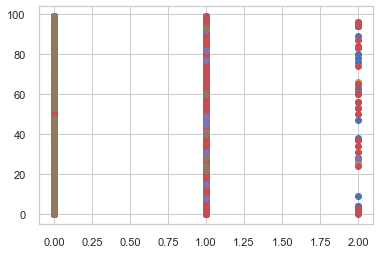

In [1897]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df.to_numpy()[row_ix, 3], df.to_numpy()[row_ix, 5])
    # show the plot
pyplot.show()

In [1898]:
clusters = kmeans.predict(df_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    590
1    516
2    425
3    499
4     20
5    160
dtype: int64

In [1899]:
#df = pd.DataFrame(df)
df["cluster"] = clusters

In [1900]:
df[df['cluster'] == 2].sample()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size,cluster
132,1,0,73448,0,0,10,236,106,189,23,...,9,4,0,0,45,4,0,725,1,2


In [1901]:
kmeans.inertia_

30612.35357274959

In [1902]:
kmeans2 = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

30612.35357274959


### Elbow method

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

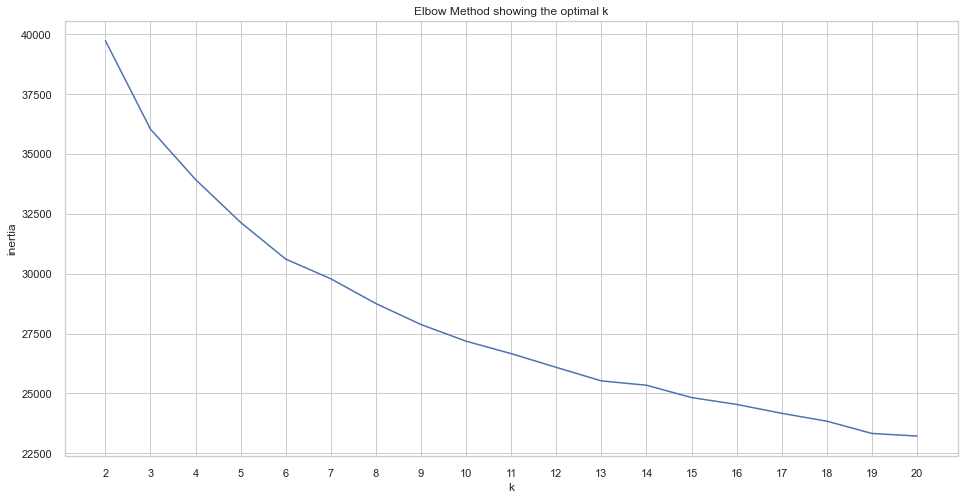

In [1903]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

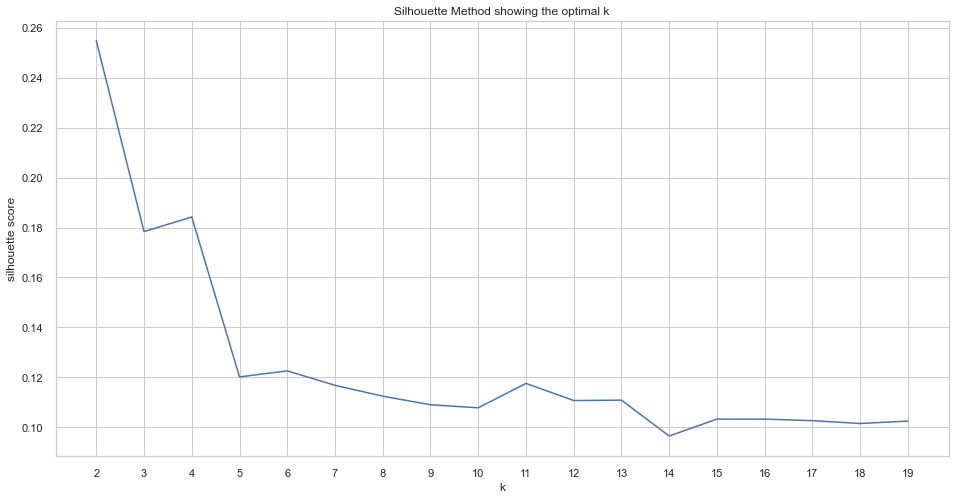

In [1904]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
   
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### visualize Silhouette

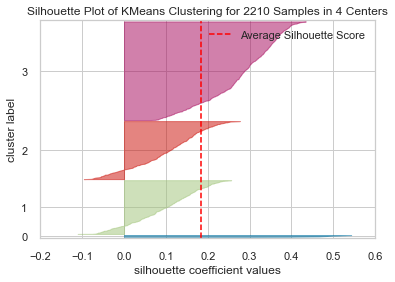

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2210 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [1905]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        
visualizer.show()       

### Ninas Heatmap

In [1906]:
df = df.reset_index(drop=True)

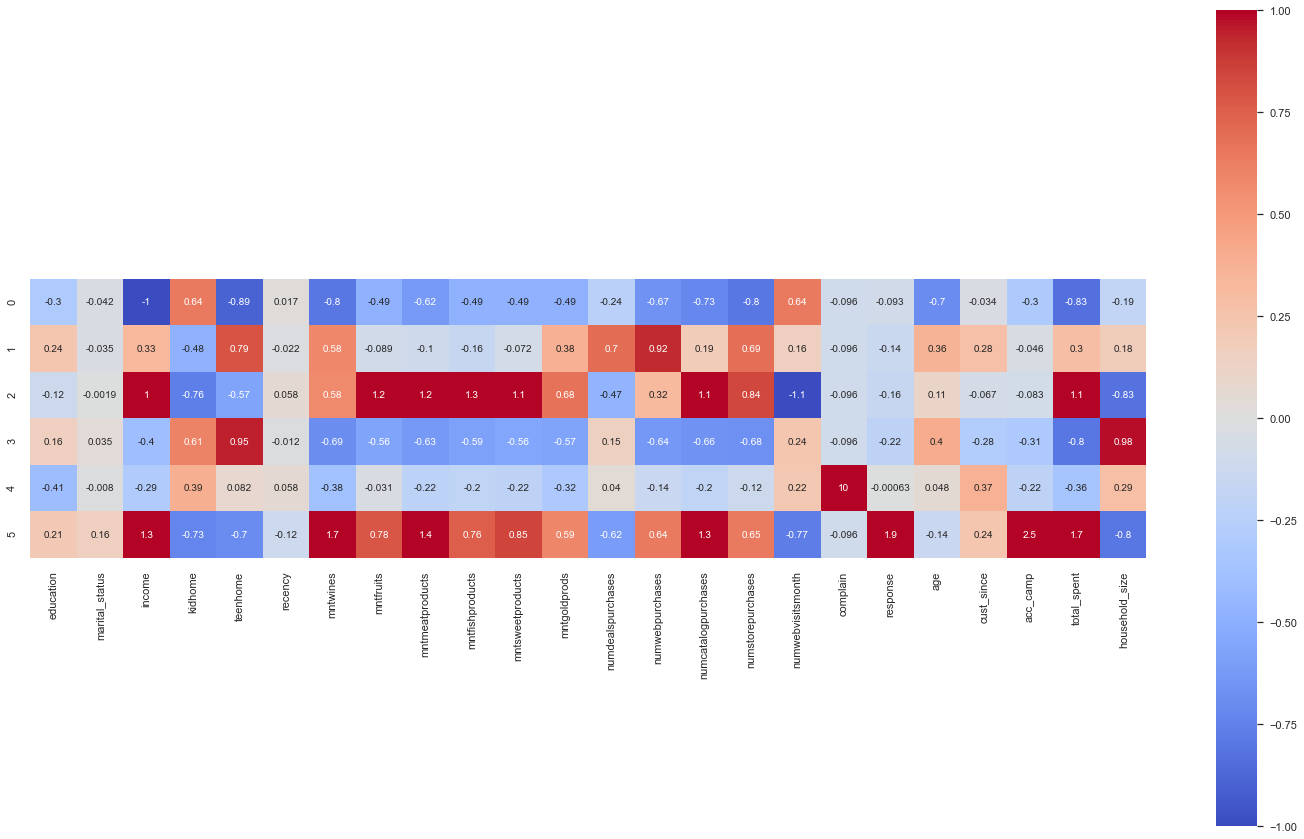

In [1907]:
#create dictionary of cluster membership for each label
cluster_labels = np.unique(df.cluster)
cluster_members = {}
for clusters in cluster_labels:
    cluster_members[clusters] = np.where(df.cluster == clusters)

#for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([df_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

#plot results as heatmap 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


## Describing + plotting Clusters 

### Save df as excel file

In [1908]:
df.to_excel(r'df_clean2.xlsx', index = False)

## Features plotted by Clusters

### Education by Cluster

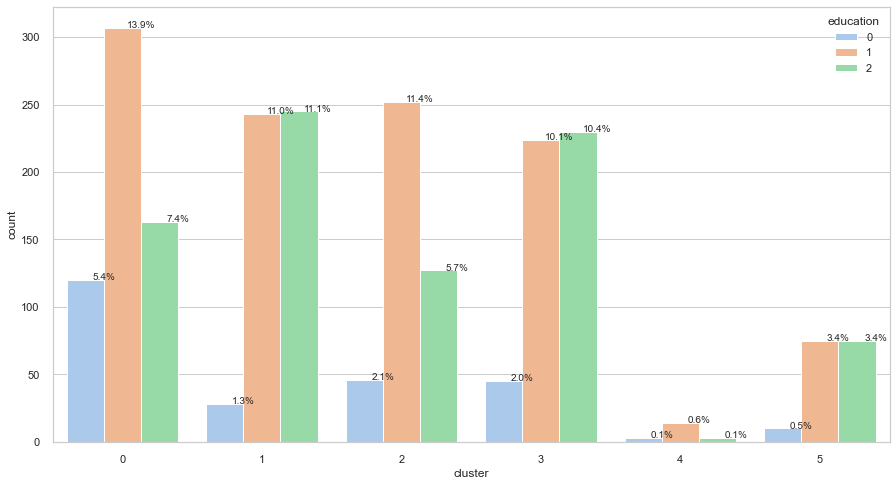

In [1974]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["education"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Marital Status by Cluster

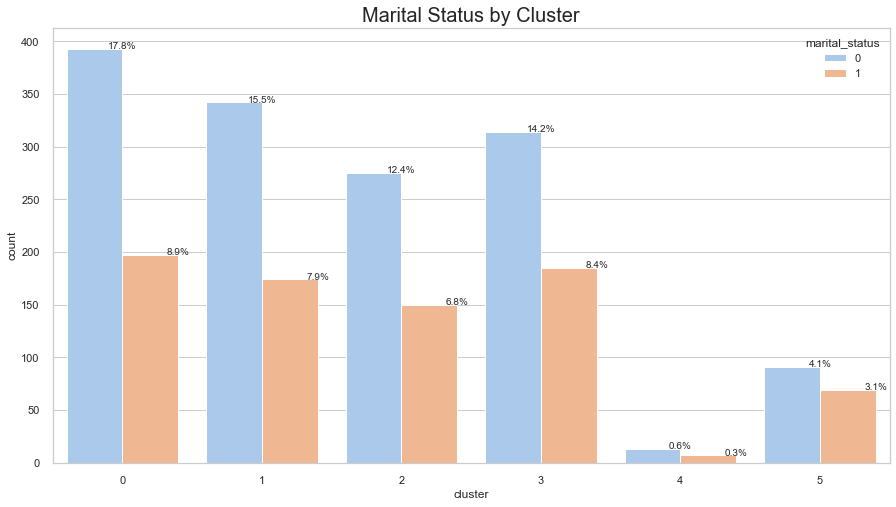

In [1967]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["marital_status"], palette=None)
plt.title('Marital Status by Cluster', fontsize=20)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show() 

### Income by Cluster

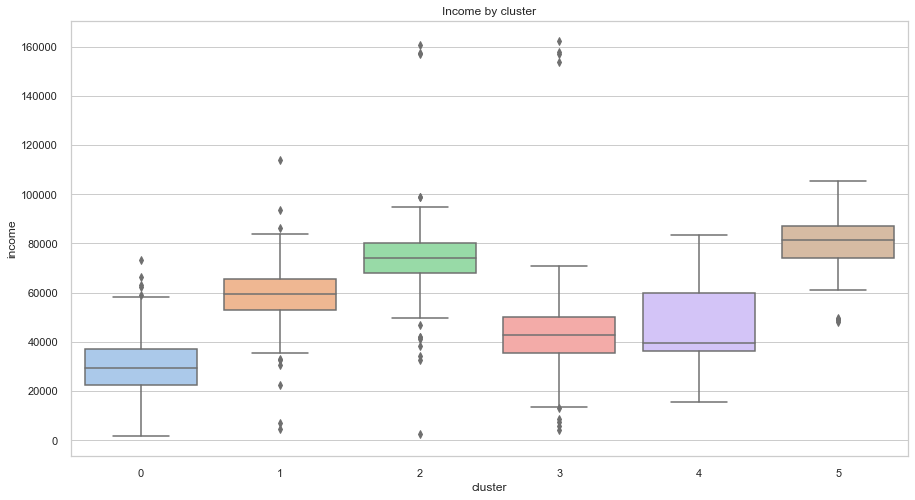

In [1978]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["income"],x=df["cluster"])
pl.set_title("Income by cluster")
plt.show()

### Children by Cluster

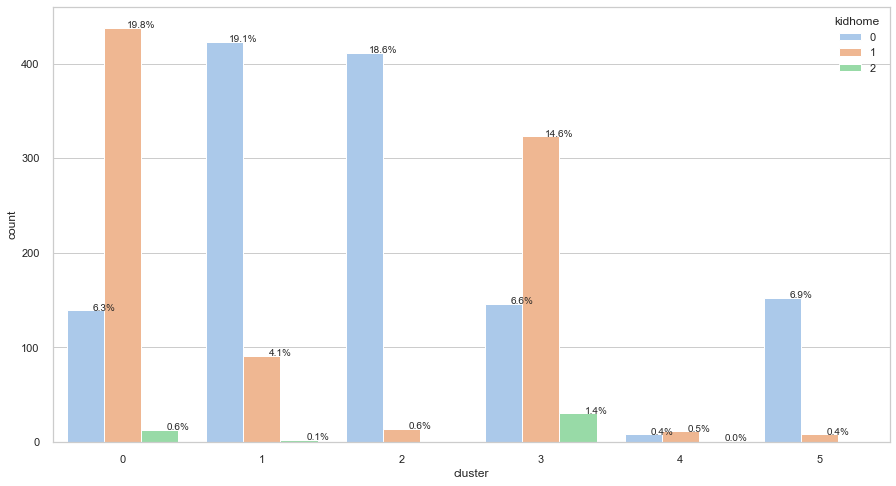

<Figure size 1440x1440 with 0 Axes>

In [1972]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["kidhome"], palette=None)
plt.figure(figsize=(20,20))
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Teenagers by Cluster

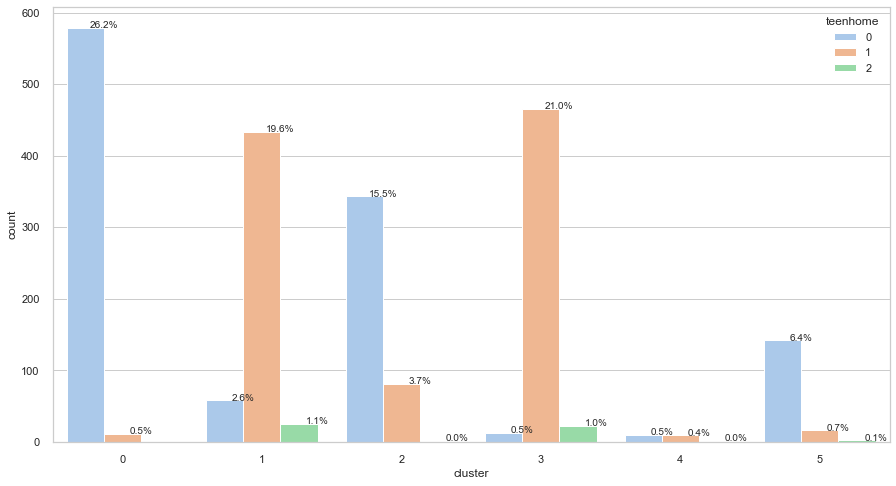

In [1971]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["teenhome"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Recency by Cluster

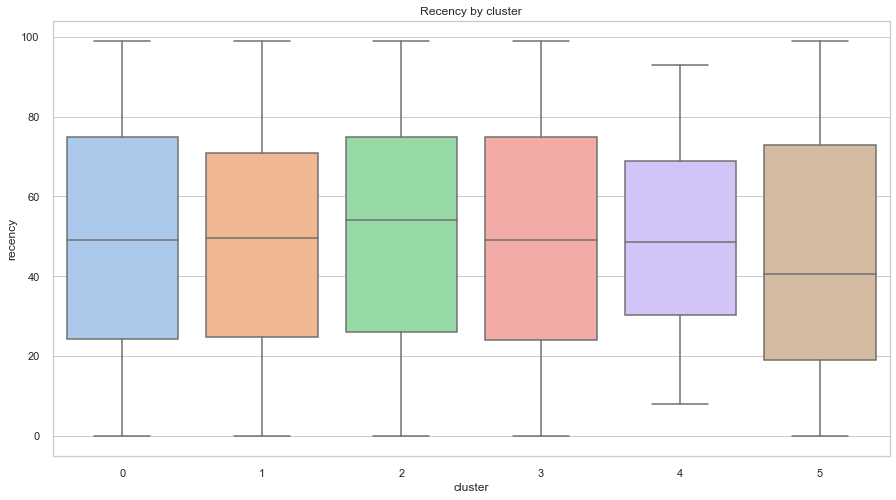

In [1990]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["recency"],x=df["cluster"])
pl.set_title("Recency by cluster")
plt.show()

### Wines by Cluster

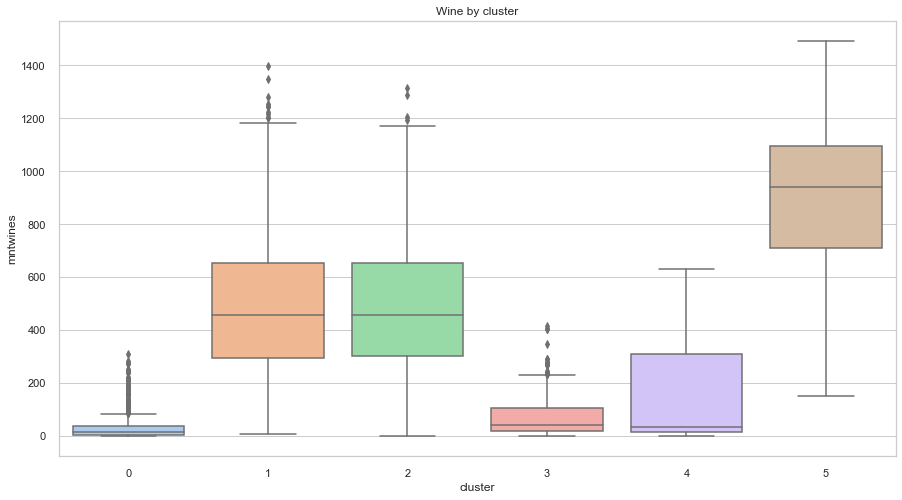

In [1976]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntwines"],x=df["cluster"])
pl.set_title("Wine by cluster")
plt.show()

### Fruit by Cluster

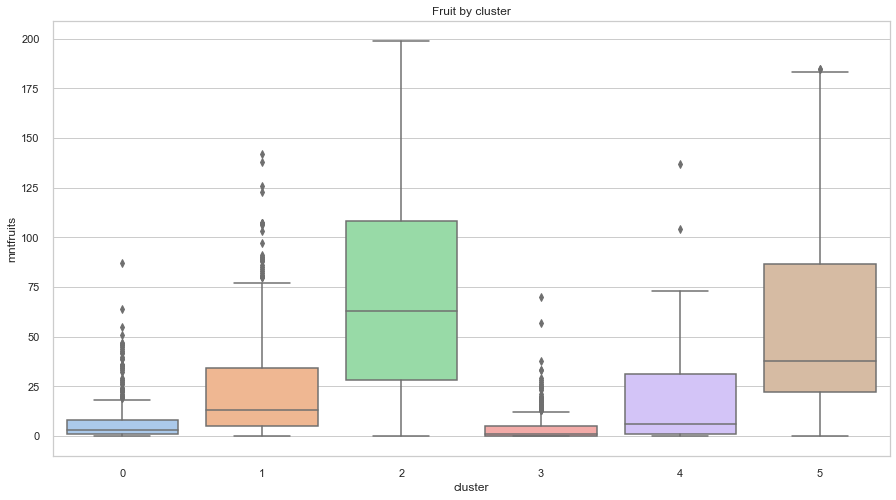

In [1991]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntfruits"],x=df["cluster"])
pl.set_title("Fruit by cluster")
plt.show()

### Meat products by Cluster

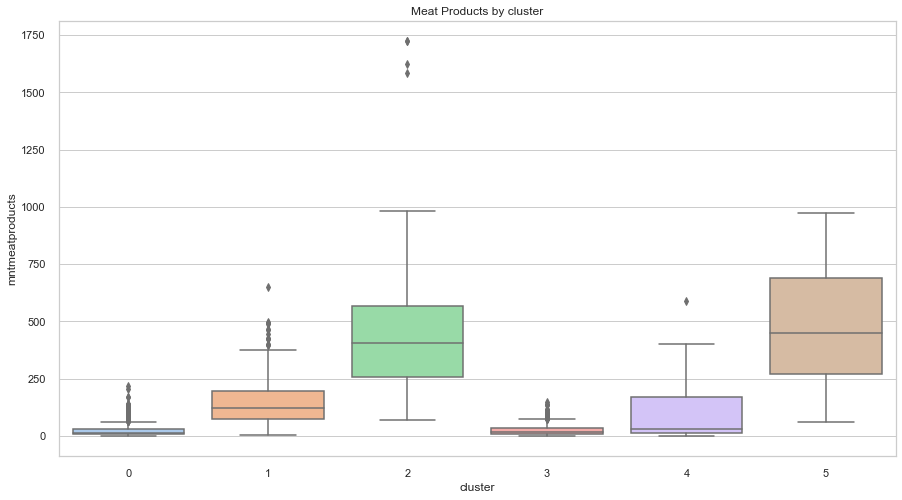

In [1992]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntmeatproducts"],x=df["cluster"])
pl.set_title("Meat Products by cluster")
plt.show()

### Fish Products by Cluster

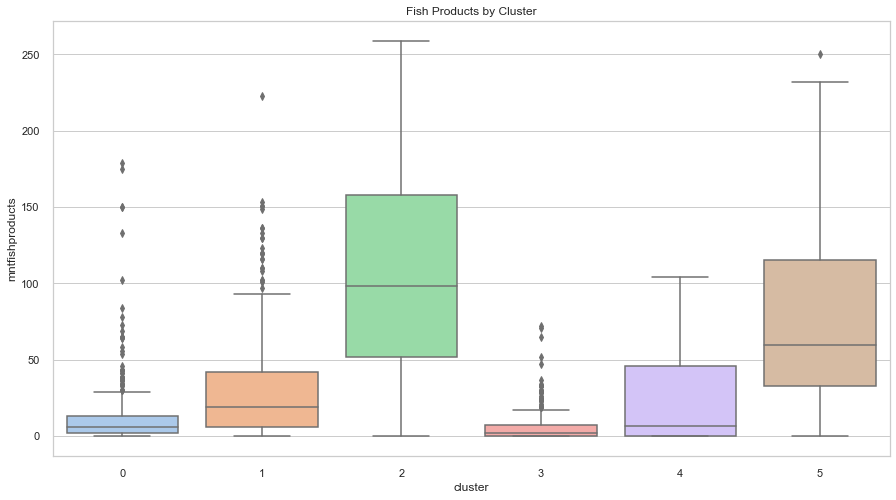

In [1993]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntfishproducts"],x=df["cluster"])
pl.set_title("Fish Products by Cluster")
plt.show()

### Sweet Products by Cluster

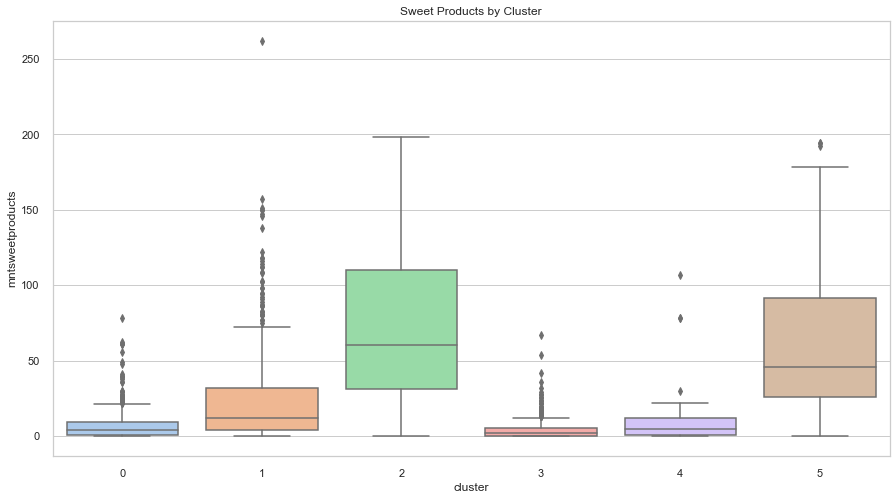

In [1995]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntsweetproducts"],x=df["cluster"])
pl.set_title("Sweet Products by Cluster")
plt.show()

### Gold Products by Cluster

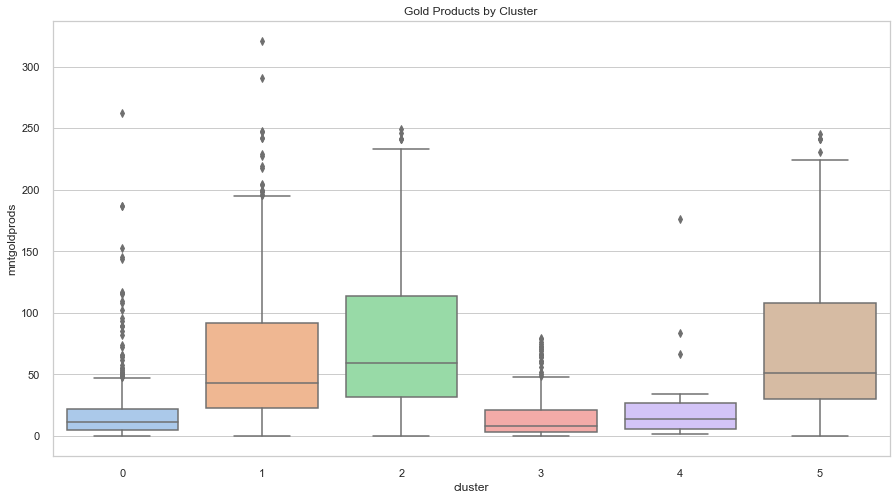

In [1996]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntgoldprods"],x=df["cluster"])
pl.set_title("Gold Products by Cluster")
plt.show()

### Number of Deals purchased by Cluster

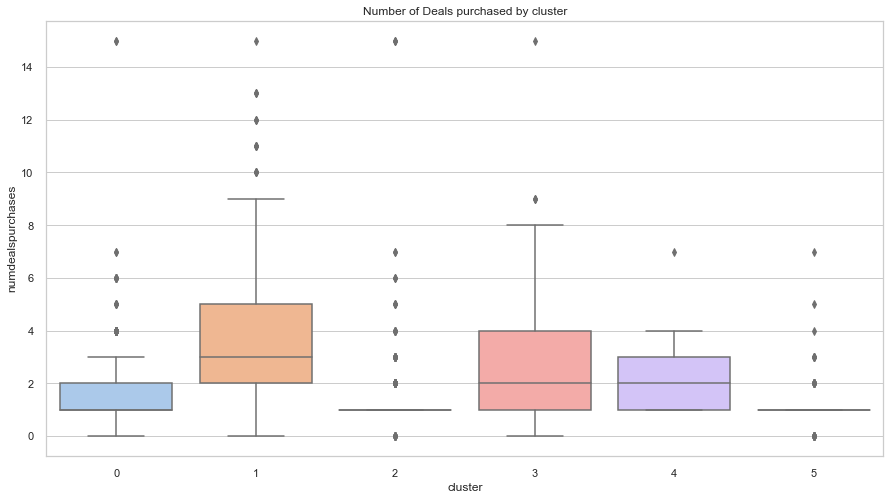

In [1999]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numdealspurchases"],x=df["cluster"])
pl.set_title("Number of Deals purchased by cluster")
plt.show() 

### Number of Web Purchases by Cluster

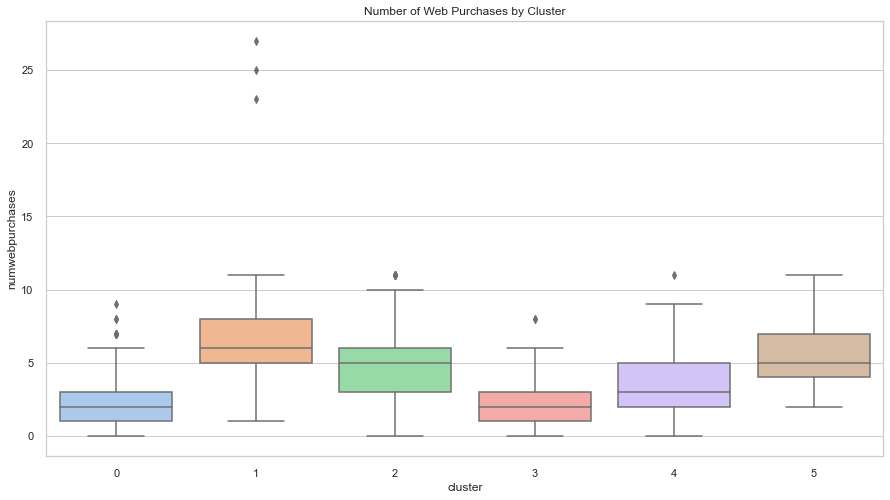

In [2004]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numwebpurchases"],x=df["cluster"])
pl.set_title("Number of Web Purchases by Cluster")
plt.show() 

### Number of Catalogue Purchases by Cluster

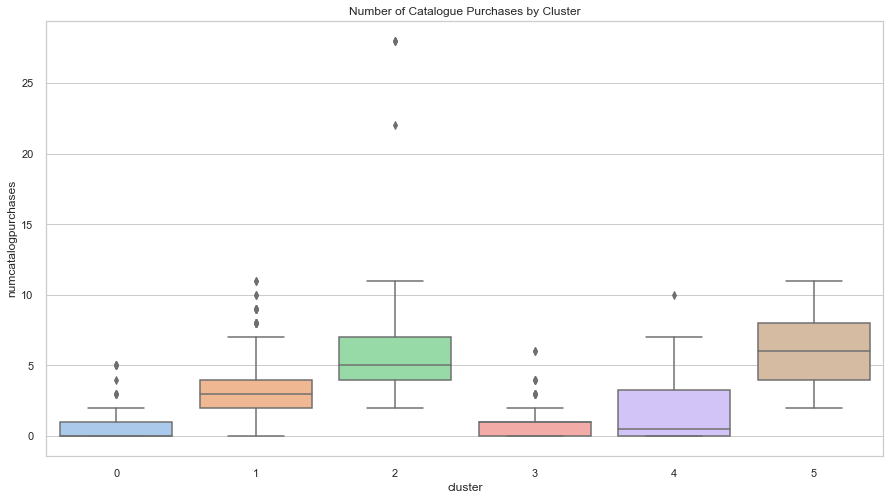

In [2003]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numcatalogpurchases"],x=df["cluster"])
pl.set_title("Number of Catalogue Purchases by Cluster")
plt.show() 

### Number of Store Purchases by Cluster

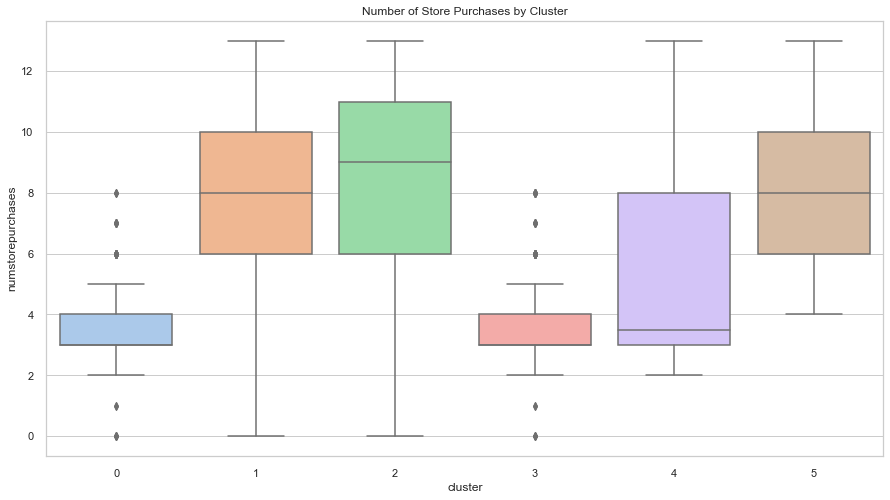

In [2005]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numstorepurchases"],x=df["cluster"])
pl.set_title("Number of Store Purchases by Cluster")
plt.show() 

### Web Visits by Cluster

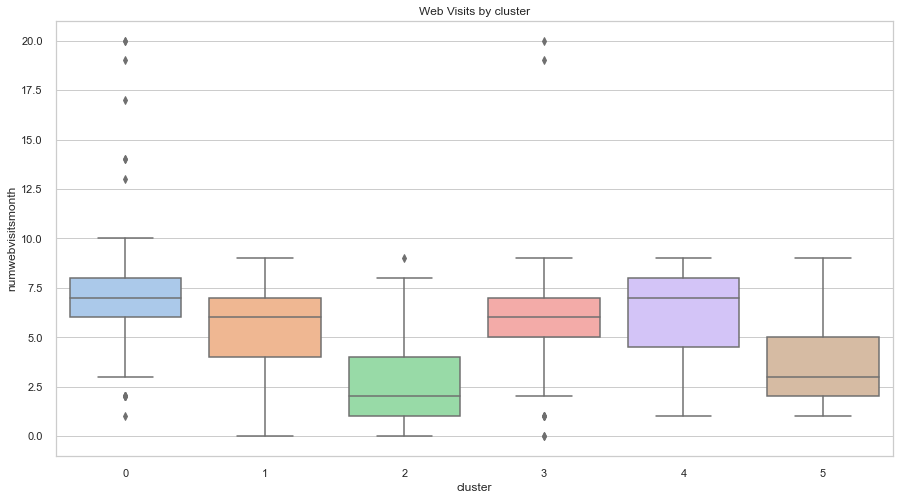

In [2009]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["numwebvisitsmonth"],x=df["cluster"])
pl.set_title("Web Visits by cluster")
plt.show()

### Complaints by Cluster

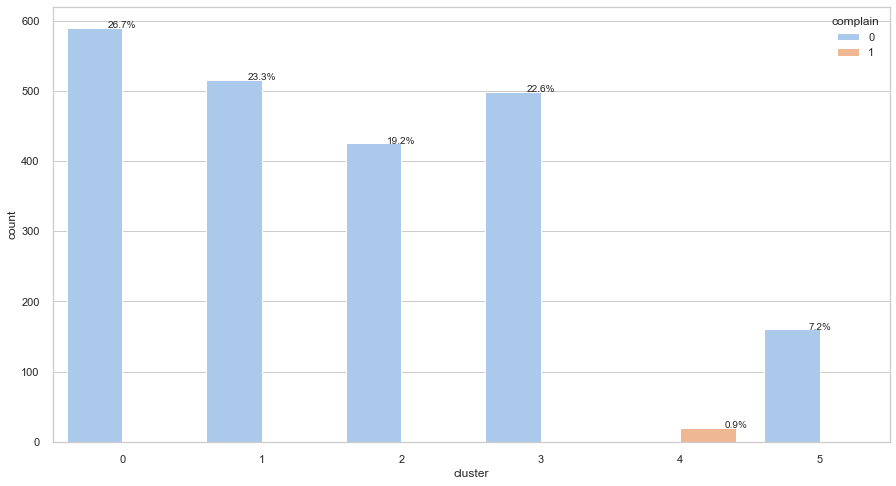

In [1970]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["complain"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Response by Cluster

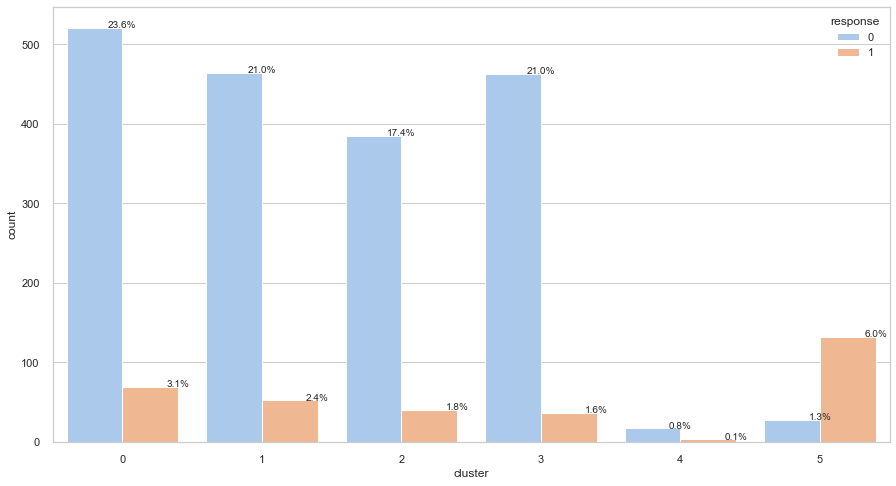

In [2006]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["response"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Age by Cluster

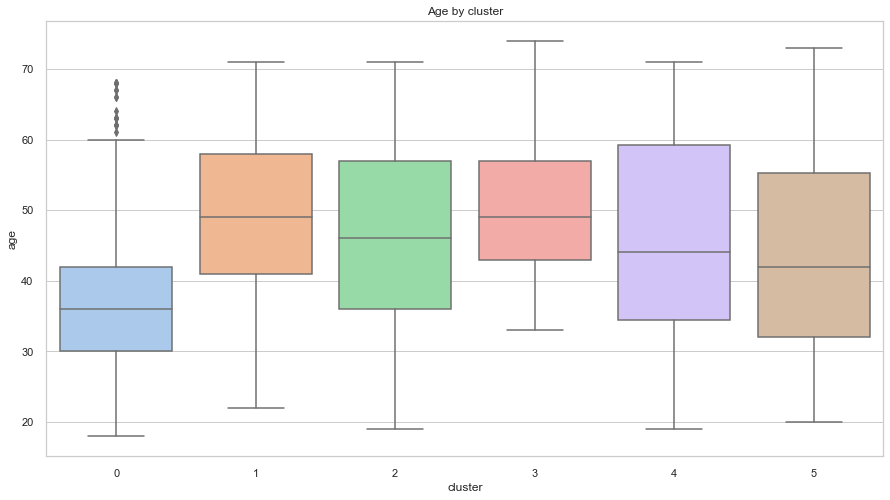

In [2007]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["age"],x=df["cluster"])
pl.set_title("Age by cluster")
plt.show()

### Accepted Campaigns by Cluster

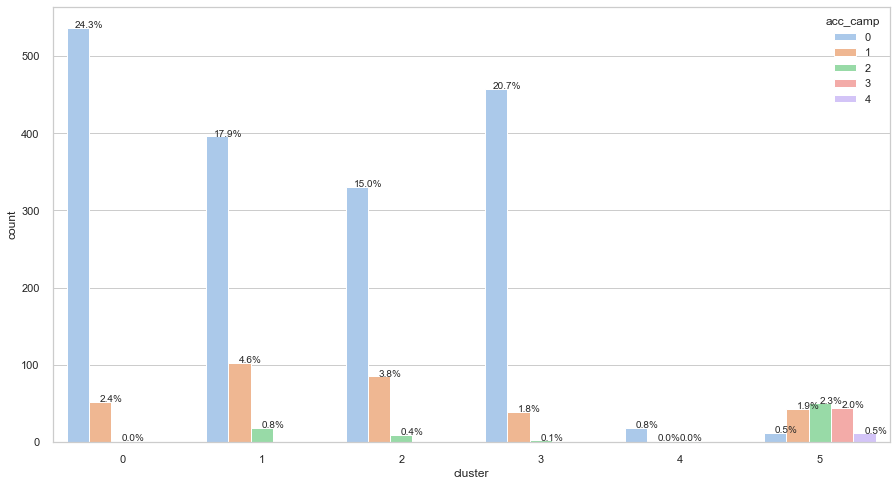

In [2008]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["acc_camp"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

### Total Amount spent by Cluster

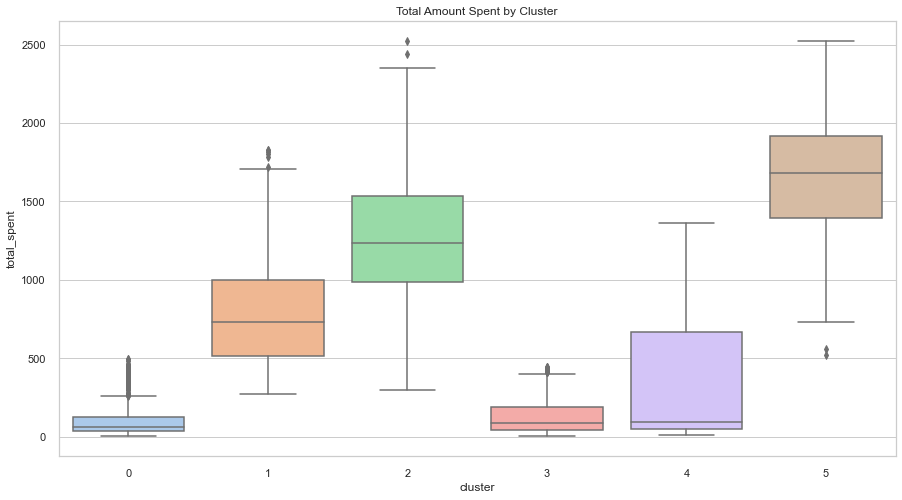

In [1998]:
sns.set_palette("pastel")
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["total_spent"],x=df["cluster"])
pl.set_title("Total Amount Spent by Cluster")
plt.show()

### Household Size by Cluster

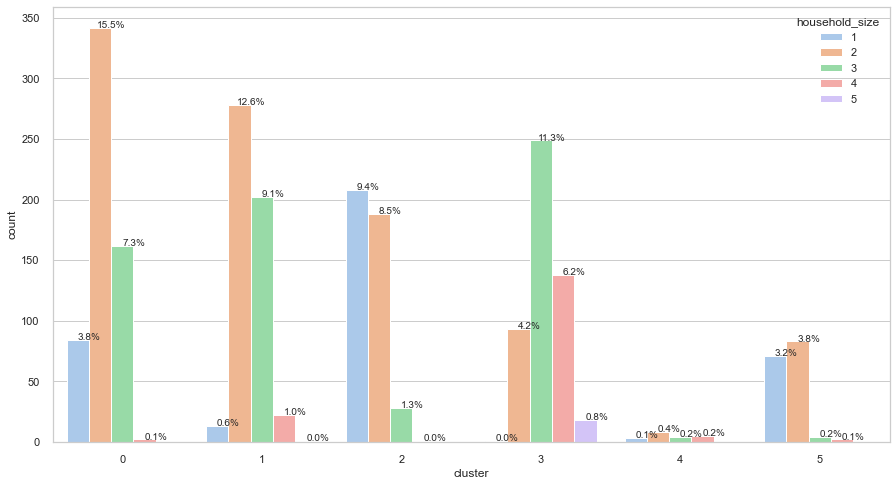

In [1973]:
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["household_size"], palette=None)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

## Plotting features against each other 

### Wines by Education (Violinplot )

<AxesSubplot:xlabel='education', ylabel='mntwines'>

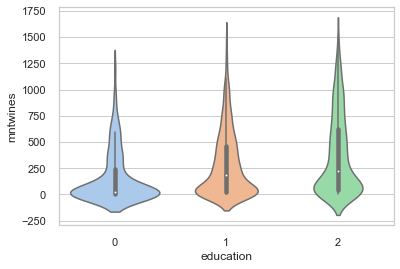

In [1965]:
sns.set_palette("pastel")
sns.violinplot(x="education", y="mntwines", data=df)

## RFM Analysis

- Recency = the interval between the last action and today
- Frequency = the number of actions between the user’s signup date and today
- Monetary value = the sum of revenue within the user’s lifetime

### create new df and columns for RFM

In [1945]:
#create frequency column
df["frequency"] = df["numcatalogpurchases"] + df["numstorepurchases"] + df["numwebpurchases"]
df["frequency"]

0       22
1        4
2       20
3        6
4       14
        ..
2205    16
2206    15
2207    18
2208    21
2209     8
Name: frequency, Length: 2210, dtype: int64

In [1946]:
#create new df 
rfm_df = df.filter(['recency','frequency','total_spent'], axis=1)

,recency,frequency,total_spent
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422
...,...,...,...
2205,46,16,1341
2206,56,15,444
2207,91,18,1241
2208,8,21,843


In [1949]:
#rename "total_spent" column
rfm_df.rename({'total_spent':'monetary'}, axis=1, inplace=True)

In [1957]:
#calculate quartiles
quartiles = rfm_df.quantile([0.25, 0.5, 0.75])
quartiles

,recency,frequency,monetary
25.00%,2400.00%,600.00%,6900.00%
50.00%,4900.00%,1200.00%,39650.00%
75.00%,7400.00%,1875.00%,104800.00%


In [1958]:
#save quartiles in dictionary
quantiles.to_dict()

{'recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 6.0, 0.5: 12.0, 0.75: 18.75},
 'monetary': {0.25: 69.0, 0.5: 396.5, 0.75: 1048.0}}

In [1959]:
# Arguments (x = value, p = recency, monetary_value, frequency, q = quartiles dict)
def rscore(x,p,q):
    if x <= q[p][0.25]:
        return 4
    elif x <= q[p][0.50]:
        return 3
    elif x <= q[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, q = quartiles dict)
def fmscore(x,p,q):
    if x <= q[p][0.25]:
        return 1
    elif x <= q[p][0.50]:
        return 2
    elif x <= q[p][0.75]: 
        return 3
    else:
        return 4

In [1960]:
#create rfm segmentation table

rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [1961]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
0,58,22,1617,2,4,4,244
1,38,4,27,3,1,1,311
2,26,20,776,3,4,3,343
3,26,6,53,3,1,1,311
4,94,14,422,1,3,3,133


In [1962]:
#We can sort the dataframe based on "rfmscore" and see our most important customers

rfm_df.sort_values('rfmscore',ascending=False)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
1633,13,28,1730,4,4,4,444
1055,23,19,1477,4,4,4,444
1338,10,19,1555,4,4,4,444
177,14,23,1581,4,4,4,444
1366,9,20,1899,4,4,4,444
...,...,...,...,...,...,...,...
818,94,4,39,1,1,1,111
1008,79,5,58,1,1,1,111
1831,85,3,13,1,1,1,111
280,76,6,68,1,1,1,111


In [1944]:
#create labels

print("stars: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print('loyals: ',len(rfm_df[rfm_df['f_quartile']==4]))#Customers who buy the most often
print("big_spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))#Customers who have generated the most revenue
print('rookies: ', len(rfm_df[rfm_df['rfmscore']=='411']))# First time buyers on the store
print('at_risk: ',len(rfm_df[rfm_df['rfmscore']=='144']))#good past customers who haven't bought recently
print('lost: ',len(rfm_df[rfm_df['rfmscore']=='111']))

stars:  74
loyals:  553
big_spenders:  552
rookies:  134
at_risk:  90
lost:  141


In [1979]:
df

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size,cluster,frequency
0,1,1,58138,0,0,58,635,88,546,172,...,7,0,1,57,21,0,1617,2,2,22
1,1,1,46344,1,1,38,11,1,6,2,...,5,0,0,60,3,0,27,4,3,4
2,1,0,71613,0,0,26,426,49,127,111,...,4,0,0,49,10,0,776,1,2,20
3,1,0,26646,1,0,26,11,4,20,10,...,6,0,0,30,4,0,53,2,0,6
4,2,0,58293,1,0,94,173,43,118,46,...,5,0,0,33,5,0,422,2,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2205,1,0,61223,0,1,46,709,43,182,42,...,5,0,0,47,12,0,1341,2,1,16
2206,2,0,64014,2,1,56,406,0,30,0,...,7,0,0,68,0,1,444,4,3,15
2207,1,1,56981,0,0,91,908,48,217,32,...,6,0,0,33,5,1,1241,2,2,18
2208,2,0,69245,0,1,8,428,30,214,80,...,3,0,0,58,5,0,843,2,1,21


### plot RFM

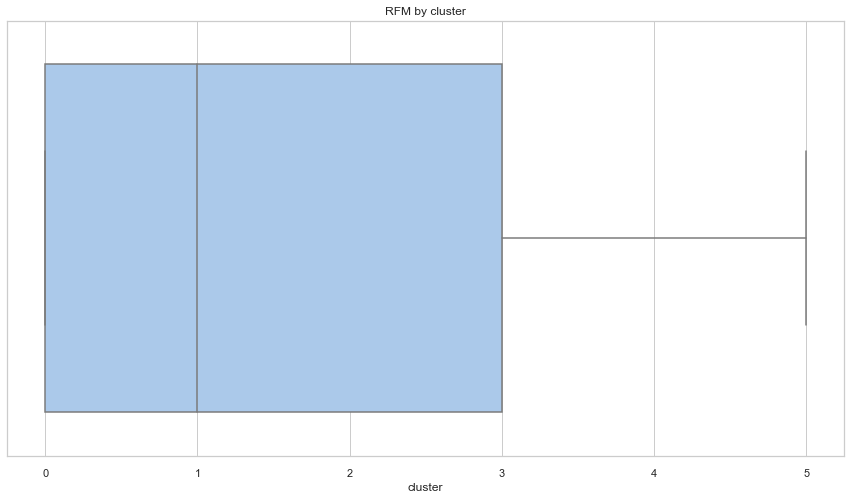

In [1985]:
#sns.scatterplot(data=rfm_df,x=df["cluster"])

plt.figure(figsize=(15,8))
pl=sns.boxplot(data=rfm_df,x=df["cluster"])
pl.set_title("RFM by cluster")
plt.show() 